# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [2]:
if os.getenv("PUIDATA")==None:
    try:
        os.environ['PUIDATA']='/Users/yanghaoming/Desktop/Data_science/PUI2018/PUIDATA'
        os.chdir(os.getenv("PUIDATA"))
        print("This is the PUIDATA file from Haoming's machine")
        print('Working directory has been changed to PUIDATA')
    except:
        os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
        os.chdir(os.getenv("PUIDATA"))
        print("This is the PUIDATA file from your machine")
        print('Working directory has been changed to PUIDATA')
else:
    print("Already present: PUIdata", os.getenv("PUIDATA"))
    os.chdir(os.getenv("PUIDATA"))
    print('Working directory has been changed to PUIDATA')

This is the PUIDATA file from Haoming's machine
Working directory has been changed to PUIDATA


In [9]:
firearms='World_firearms_murders_and_ownership.csv'
misshot='data-pvLFI.csv'
GDP='API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv'
pop='API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv'
os.system('curl -O https://raw.githubusercontent.com/haomingsama/PUI2018_hy1528/master/HW9_hy1528/World_firearms_murders_and_ownership.csv')
os.system('curl -O https://raw.githubusercontent.com/haomingsama/PUI2018_hy1528/master/HW9_hy1528/data-pvLFI.csv')
os.system('curl -O https://raw.githubusercontent.com/haomingsama/PUI2018_hy1528/master/HW9_hy1528/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv')
os.system('curl -O https://raw.githubusercontent.com/haomingsama/PUI2018_hy1528/master/HW9_hy1528/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')

firearms_df=pd.read_csv(firearms)
misshot_df=pd.read_csv(misshot)
GDP_df=pd.read_csv(GDP,skiprows = [0,3],header=1,error_bad_lines=False)
pop_df=pd.read_csv(pop,skiprows = [0,3],header=1,error_bad_lines=False)

In [10]:
GDP_df=GDP_df[['Country Name','2012']]
GDP_df=GDP_df.rename(columns={'2012':'gdp'})
GDP_df.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [11]:
pop_df=pop_df[['Country Name','2012']]
pop_df=pop_df.rename(columns={'2012':'pop'})
pop_df.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [12]:
firearms_df=firearms_df[['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']]
firearms_df.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [13]:
misshot_df.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [15]:
merge1=firearms_df.merge(pop_df,left_on='Country/Territory',right_on='Country Name',how='inner')
merge1.drop(columns=['Country Name'],inplace=True)
merge1=merge1.merge(GDP_df, left_on='Country/Territory',right_on='Country Name',how='inner')
merge1.drop(columns=['Country Name'],inplace=True)
merge1=merge1.merge(misshot_df, left_on='Country/Territory',right_on='Country',how='inner')
merge1.drop(columns=['Country'],inplace=True)
merge1=merge1.rename(columns={'Country/Territory':'Country'})
df_=merge1
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,pop,gdp,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,30.4,1
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,17.2,2
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


In [19]:
df_.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings'},inplace=True)

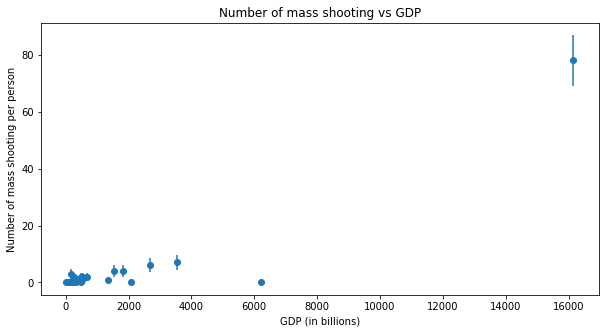

In [49]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('Number of mass shooting vs GDP')
pl.show()


## Figure1:
####  Number of mass shooting vs GDP, errors represent Poisson statistics.

####  The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [30]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['ave_civilian_fire_pp'] = df_["Average total all civilian firearms"] / df_['pop'] 


## Without errors

(-0.049294683204855944, 0.9147487183463803)

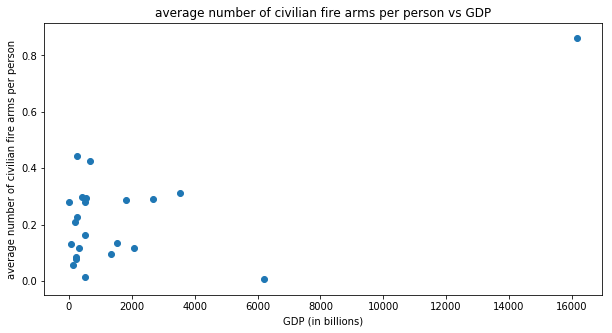

In [50]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9,df_['ave_civilian_fire_pp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per person")
pl.title('average number of civilian fire arms per person vs GDP')
ax.set_ylim()

## Figure2:
#### average number of civilian fire arms per person vs GDP
#### The datapoint to the top right of the plot is the USA, 
#### which has noth the highest GDP and the highest number ofaverage number of civilian fire arms per person

## With errors

Text(0.5,1,'average number of civilian fire arms per person vs GDP')

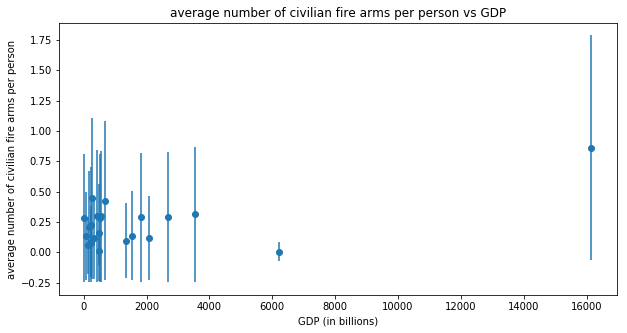

In [51]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9,df_['ave_civilian_fire_pp'])
ax.errorbar(df_.gdp / 1e9, df_['ave_civilian_fire_pp'], 
            yerr = np.sqrt(df_['ave_civilian_fire_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per person")
ax.set_ylim()
pl.title('average number of civilian fire arms per person vs GDP')


## Figure3:
#### average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
#### The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of average number of civilian fire arms per person

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [45]:
df_['homicide_pp'] = df_["Number of homicides by firearm"] / df_['pop'] * 1e3

Text(0.5,1,'Historgram of average number of homicide by fire arms per person')

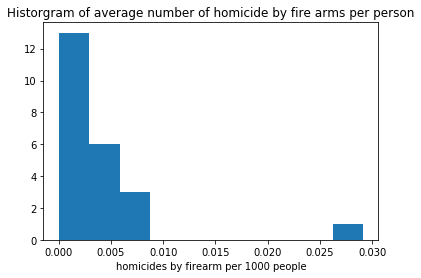

In [52]:
fig, ax = pl.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
pl.title('Historgram of average number of homicide by fire arms per person')

## Figure 4:
#### The historgram of average number of homicide by fire arms per person shows that there are very likely some outlier in the data(correspond to the rightmost point)`

Text(0.5,1,'average number of homicide by fire arms per person vs GDP')

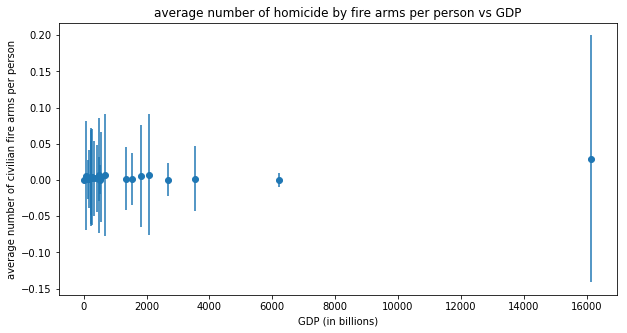

In [53]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9,df_['homicide_pp'])
ax.errorbar(df_.gdp / 1e9, df_['homicide_pp'], 
            yerr = np.sqrt(df_['homicide_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("average number of civilian fire arms per person")
ax.set_ylim()
pl.title('average number of homicide by fire arms per person vs GDP')

## Figure 5:
#### Average number of homicide by fire arms per person vs GDP, errors represent Poisson statistics.

#### The datapoint to the rightmost of the plot is the USA, which has noth the highest GDP but not very prominent in terms of average number of homicide by fire arms per person. However, it also have the highest average number of homicide by fire arms per person


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [58]:
df_US=df_[df_.Country=='United States']
df_other=df_[~(df_.Country=='United States')]

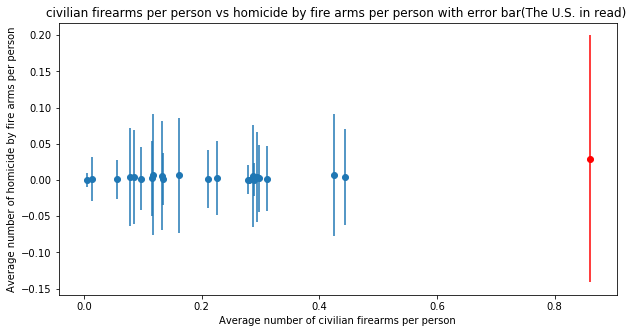

In [66]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter1 = ax.scatter(df_other['ave_civilian_fire_pp'], df_other['homicide_pp'])
ax.errorbar(df_other['ave_civilian_fire_pp'], df_other['homicide_pp'], 
            yerr = np.sqrt(df_other['homicide_pp'] * 1.0), fmt = '.')
scatter1 = ax.scatter(df_US['ave_civilian_fire_pp'], df_US['homicide_pp'],color='r')
ax.errorbar(df_US['ave_civilian_fire_pp'], df_US['homicide_pp'], 
            yerr = np.sqrt(df_US['homicide_pp'] * 1.0),color='r', fmt = '.')

ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Average number of homicide by fire arms per person")
ax.set_ylim()
pl.title('civilian firearms per person vs homicide by fire arms per person with error bar(The U.S. in read) ')
pl.show()


## Figure 6:
#### The graph shows the relationship between Average number of civilian firearms per person and Average number of homicide by fire arms per person

#### The U.S. is hightlighted in red, showing the highest value on both axis and largest error bar

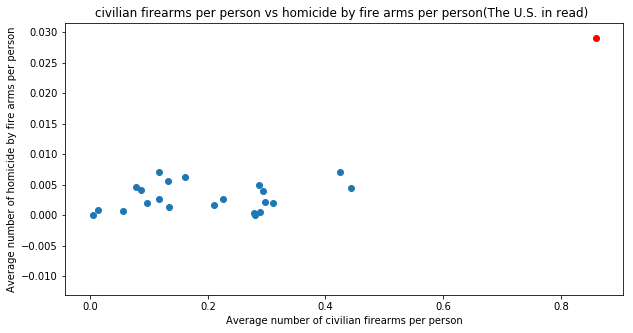

In [63]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter1 = ax.scatter(df_other['ave_civilian_fire_pp'], df_other['homicide_pp'])

scatter1 = ax.scatter(df_US['ave_civilian_fire_pp'], df_US['homicide_pp'],color='r')


ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Average number of homicide by fire arms per person")
ax.set_ylim()
pl.title('civilian firearms per person vs homicide by fire arms per person(The U.S. in read) ')
pl.show()


## Figure 7:
#### The graph shows the relationship between Average number of civilian firearms per person and Average number of homicide by fire arms per person

#### The U.S. is hightlighted in red without error bar, showing the highest value on both axis.

#### This graph suggest clearly that the U.S. might be a outlier in a higher chance

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


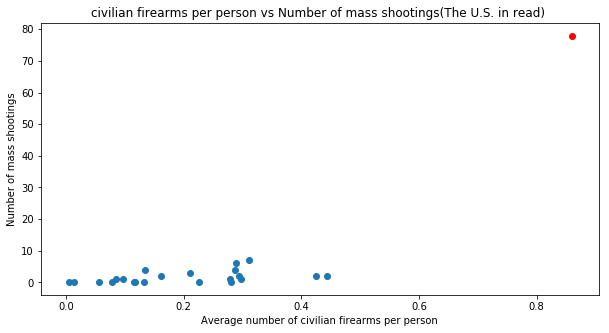

In [64]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter1 = ax.scatter(df_other['ave_civilian_fire_pp'], df_other['Number of mass shootings'])

scatter1 = ax.scatter(df_US['ave_civilian_fire_pp'], df_US['Number of mass shootings'],color='r')


ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.title('civilian firearms per person vs Number of mass shootings(The U.S. in read) ')
pl.show()

## Figure 9:
#### The graph shows the relationship between Average number of civilian firearms per person and Number of mass shootings

#### The U.S. is hightlighted in red without error bar, showing the highest value on both axis.

#### This graph suggest clearly that the U.S. might be a outlier in a high chance

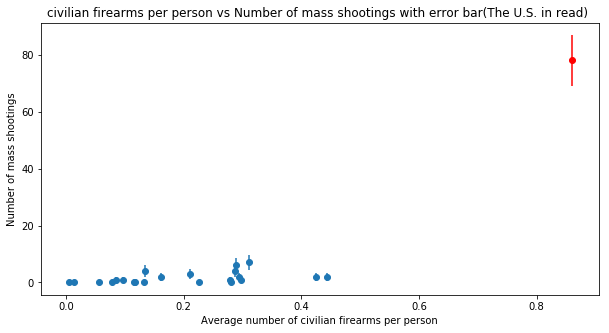

In [65]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter1 = ax.scatter(df_other['ave_civilian_fire_pp'], df_other['Number of mass shootings'])
ax.errorbar(df_other['ave_civilian_fire_pp'], df_other['Number of mass shootings'], 
            yerr = np.sqrt(df_other['Number of mass shootings'] * 1.0), fmt = '.')
scatter1 = ax.scatter(df_US['ave_civilian_fire_pp'], df_US['Number of mass shootings'],color='r')
ax.errorbar(df_US['ave_civilian_fire_pp'], df_US['Number of mass shootings'], 
            yerr = np.sqrt(df_US['Number of mass shootings'] * 1.0),color='r', fmt = '.')

ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.title('civilian firearms per person vs Number of mass shootings with error bar(The U.S. in read) ')
pl.show()

## Figure 10:
#### The graph shows the relationship between Average number of civilian firearms per person and Number of mass shootings

#### The U.S. is hightlighted in red with error bar, showing the highest value on both axis and have the largest error bar.

#### This graph suggest clearly that the U.S. might be a outlier in a high chance

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [73]:
from sklearn import preprocessing
import statsmodels.api as sm 

In [69]:
x=df_.ave_civilian_fire_pp
y=df_['Number of mass shootings']

In [71]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [72]:
X=preprocessing.StandardScaler().fit_transform(x)
Y=preprocessing.StandardScaler().fit_transform(y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [110]:
lm=sm.OLS(Y,X).fit()
y_fit=lm.predict(X)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


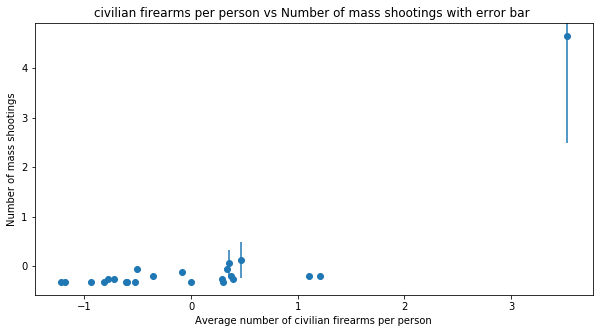

In [81]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter1 = ax.scatter(X,Y)
ax.errorbar(X,Y, yerr = np.sqrt(Y * 1.0), fmt = '.')


ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Number of mass shootings")

pl.title('civilian firearms per person vs Number of mass shootings with error bar ')
pl.show()


## Figure 11
#### This is the scatter plot of civilian firearms per person vs Number of mass shootings with error bar
#### The orignial data point shows that the upper right cornor data point might be an outlier

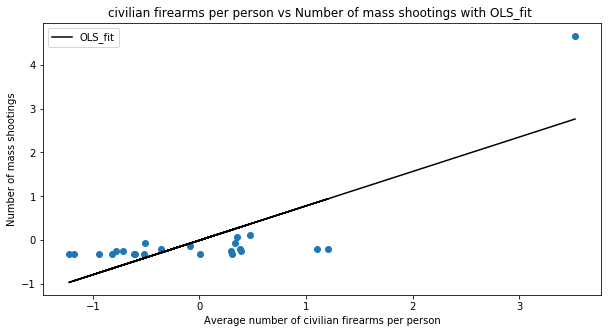

In [86]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(X,Y)
ax.plot(X,y_fit,color='k',label='OLS_fit')

ax.set_xlabel("Average number of civilian firearms per person")
ax.set_ylabel("Number of mass shootings")
pl.legend()
pl.title('civilian firearms per person vs Number of mass shootings with OLS_fit ')
pl.show()

## Figure12:
#### This a the scatter plot of original data with OLS fited line
#### From the graph we could found that compared with other data point, the upperright data point is too far away fronm the OLS fited line

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



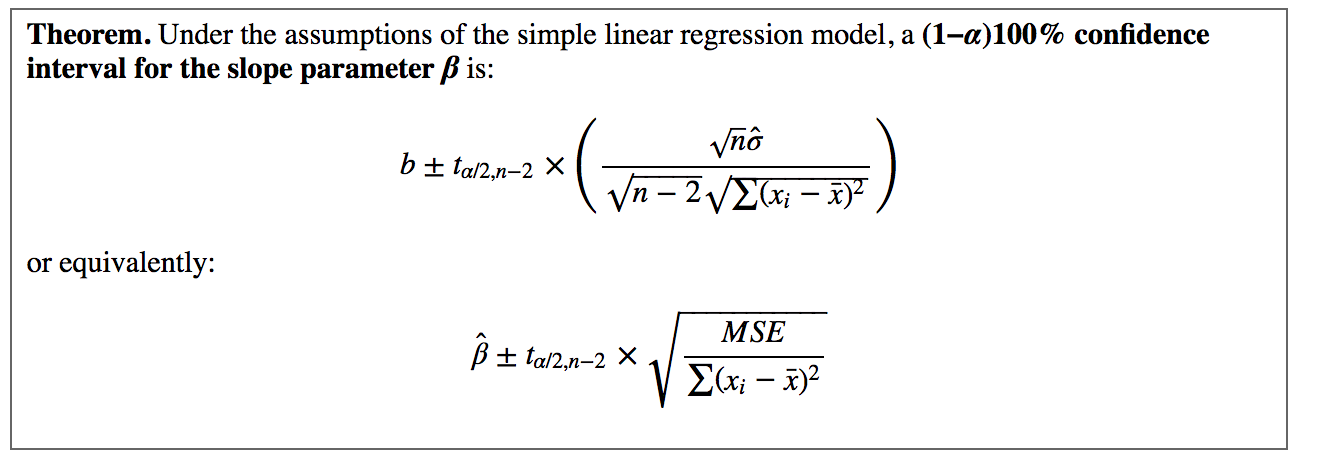

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

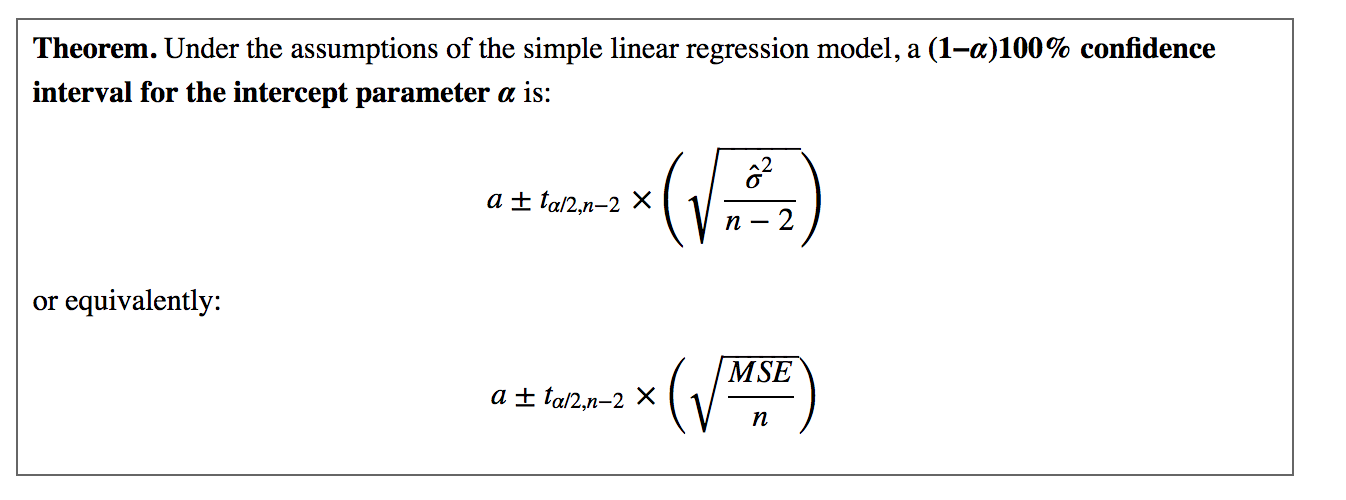

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

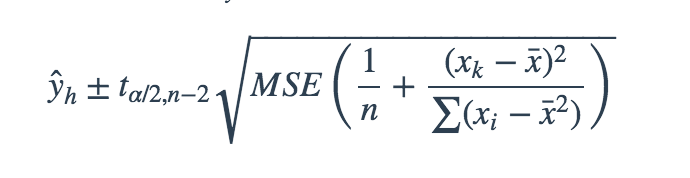

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

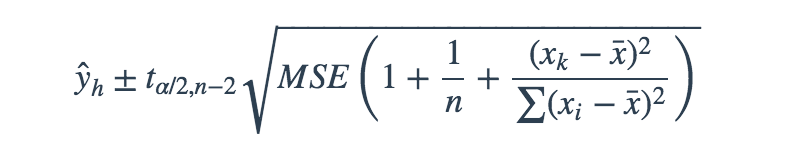

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

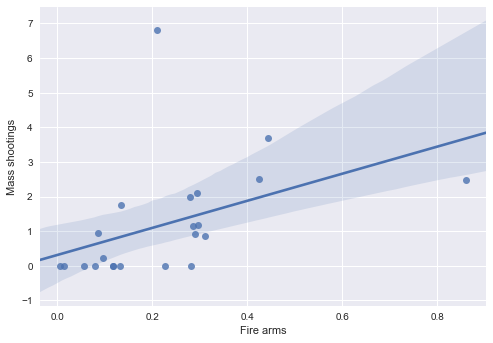

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

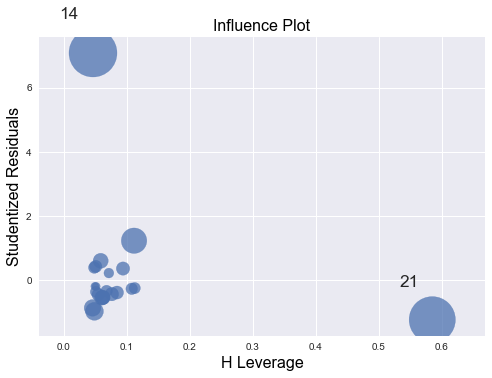

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings